In [179]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [180]:
import numpy as np

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from nuq.dup import NuqClassifierDup


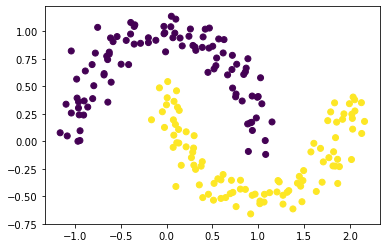

In [181]:
x, y = make_moons(200)
x += 0.1 * np.random.randn(200, 2)
plt.scatter(x[:, 0], x[:, 1], c=y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=40)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=40)

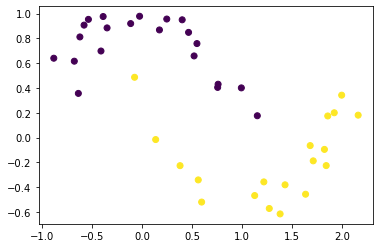

In [182]:
plt.scatter(x_val[:, 0], x_val[:, 1], c=y_val)

0
1
(1600, 2)
[-0.12917829 -0.14642906 -0.16641736 ... -0.68532085 -0.61850762
 -0.5569557 ]


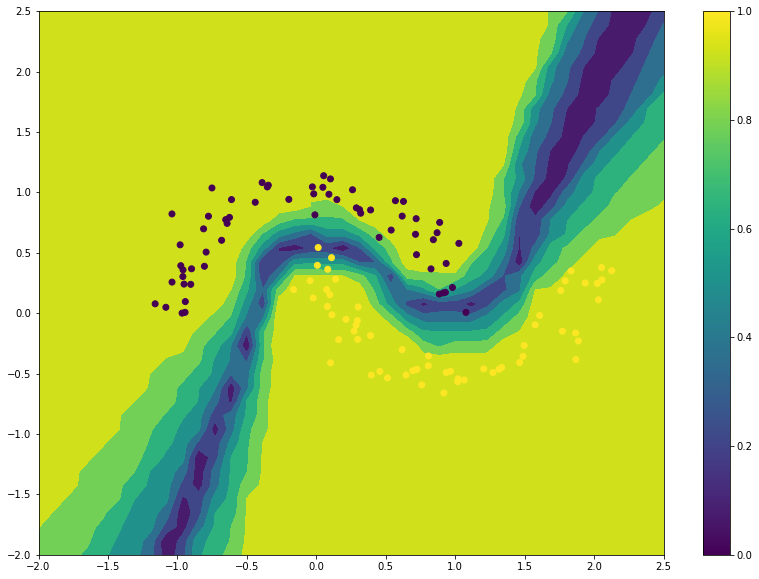

In [194]:
model = NuqClassifierDup(kernel_type='RBF')
model.fit(x_train, y_train)

fig_size = (14, 10)

x_mesh = np.array(np.meshgrid(np.linspace(-2, 2.5, 40), np.linspace(-2, 2.5, 40))).reshape(2, -1)
x_mesh = np.moveaxis(x_mesh, 0, 1)
prediction_mesh, _ = model.predict_log_proba(x_mesh)
prediction_mesh = np.max(prediction_mesh, axis=-1)
print(prediction_mesh)
plt.figure(figsize=fig_size)
plt.contourf(x_mesh[:, 0].reshape((40, 40)), x_mesh[:, 1].reshape(40, 40), prediction_mesh.reshape(40, 40))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.colorbar()
plt.show()



0
1
(1600, 2)


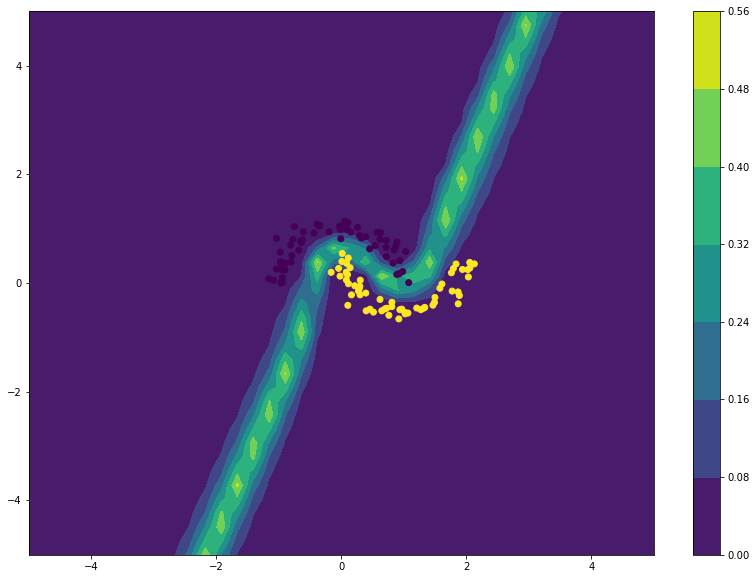

In [195]:
model = NuqClassifierDup(kernel_type='RBF', n_neighbors=20)
model.fit(x_train, y_train)

w = 5
x_mesh = np.array(np.meshgrid(np.linspace(-w, w, 40), np.linspace(-w, w, 40))).reshape(2, -1)
x_mesh = np.moveaxis(x_mesh, 0, 1)

model._update_bandwidth(0.5)
_, uncertainty = model.predict_log_proba(x_mesh, 'aleatoric')
prediction_mesh = uncertainty
plt.figure(figsize=fig_size)
plt.contourf(x_mesh[:, 0].reshape((40, 40)), x_mesh[:, 1].reshape(40, 40), prediction_mesh.reshape(40, 40))
plt.colorbar()
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.show()


In [211]:
import matplotlib

font = {'family' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

-5.145816486449573 15.764093320446568


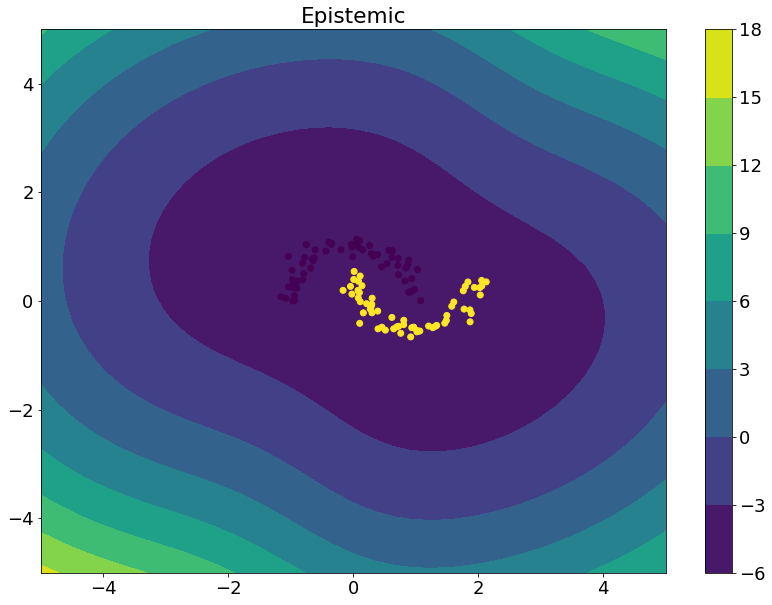

In [228]:
model = NuqClassifierDup(kernel_type='RBF', n_neighbors=120)
model.fit(x_train, y_train)
w = 5
x_mesh = np.array(np.meshgrid(np.linspace(-w, w, 40), np.linspace(-w, w, 40))).reshape(2, -1)
x_mesh = np.moveaxis(x_mesh, 0, 1)

_, uncertainty = model.predict_log_proba(x_mesh, 'epistemic')
prediction_mesh = uncertainty
plt.figure(figsize=fig_size)
plt.contourf(x_mesh[:, 0].reshape((40, 40)), x_mesh[:, 1].reshape(40, 40), prediction_mesh.reshape(40, 40))
plt.colorbar()
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
print(np.min(prediction_mesh), np.max(prediction_mesh))
plt.title("Epistemic")
plt.savefig('log_prob_density.png')
plt.show()

In [ ]:
# prediction_mesh.reshape(40, 40)